# [Lab Session 2](otsu.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

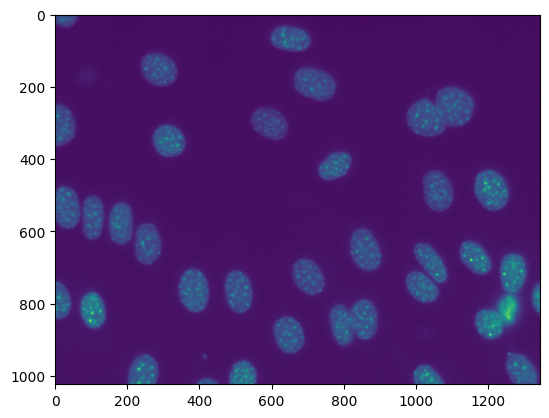

In [ ]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')
plt.figure()
plt.imshow(imgf)


**[Task 1.2.]()** Quantify the image into 256 bins:

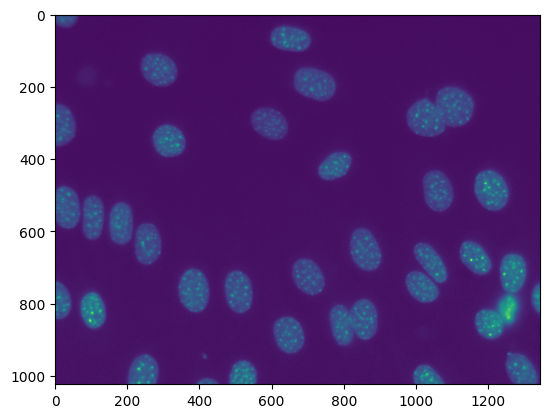

In [4]:
img8 = (imgf * 255).round().astype(np.uint8)
plt.figure()
plt.imshow(img8)


**[Task 1.3.]()** Compute the image histogram:

In [5]:
h = np.zeros(256, dtype=int)

flat = img8.ravel()

for x in flat: 
    h[x] += 1


Show the computed histogram:

<BarContainer object of 256 artists>

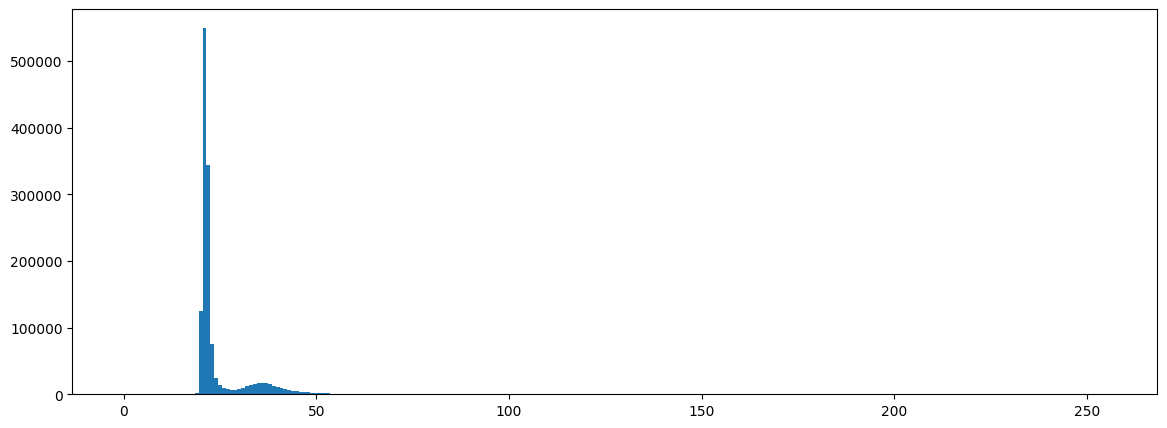

In [6]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [11]:
otsu_list = []
 

for T in range(0, 255): 
    
    tot_num = np.sum(h[0:T])
    tot_num2 = np.sum(h[T:256])
    if tot_num == 0 or tot_num2 == 0: 
        otsu_list.append(np.inf)
        continue
    
    mean_int = (1/tot_num) * np.sum(np.arange(0, T) * h[0:T])
    mean_int2 = (1/tot_num2) * np.sum(np.arange(T, 256) * h[T:256])
    
    int_var = (1/tot_num) * np.sum(((np.arange(0, T) - mean_int))**2 * h[0:T])
    int_var2 = (1/tot_num2) * np.sum(((np.arange(T, 256) - mean_int2))**2 * h[T:256])

    otsu = (tot_num * int_var) + (tot_num2 * int_var2)

    otsu_list.append(otsu)

print(otsu_list.index(min(otsu_list)))
T_otsu = otsu_list.index(min(otsu_list))

print(otsu_list)



31
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 62268423.498969294, 62231302.67756924, 59818223.62454262, 47165648.8532488, 27449150.578243654, 18586354.369352486, 15253989.89752736, 13539656.280118147, 12557445.788958637, 11933561.897967242, 11536254.189242972, 11313729.002291556, 11275653.93934225, 11495860.3303481, 12094366.788917104, 13176916.55272644, 14767374.26909976, 16902177.863184586, 19466392.136486113, 22316940.04301708, 25216024.018789776, 28108330.895324476, 30810951.555261694, 33287950.232029453, 35560795.16565559, 37671210.8137913, 39656813.25915195, 41533993.496337675, 43351146.153180584, 45045719.271170646, 46595703.72321466, 48078570.113680676, 49403191.17985922, 50631766.8368401, 51670386.544526696, 52624546.35408482, 53491899.42302659, 54303594.97879357, 55021626.25829551, 55689016.9226695, 56304749.0481883, 56916048.47190149, 57440116.5914299, 57931260.985612154, 58353842.48861135, 58740900.22080411, 59144135.8964

**[Task 1.5.]()** Perform Otsu thresholding:

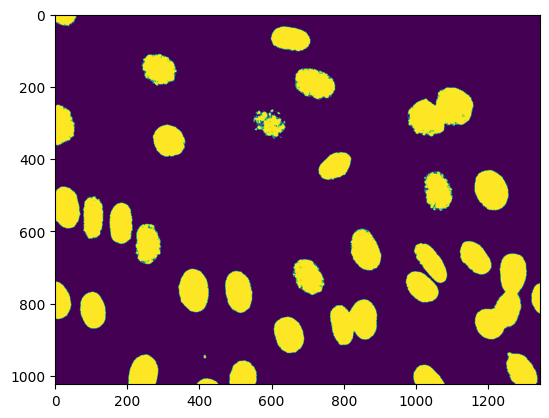

In [8]:
imgT = (img8 >= T_otsu).astype(np.uint8)
plt.figure()
plt.imshow(imgT)

**[Task 1.6.]()** Compute the Dice coefficient:

In [10]:
G = plt.imread('data/NIH3T3/gt/0.png')

Zähler = np.sum(G * imgT)
Nenner1 = np.sum(G)
Nenner2 = np.sum(imgT)

dice = 2 * Zähler / (Nenner1 + Nenner2)
print(dice)

0.8943783223933183
